In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

In [2]:
data=pd.read_csv('loan (1).csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Explore the dataset to get better view of the structure of the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
# Check % of missing values present in each columns
data.isna().sum()/len(data) *100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [11]:
#Check duplicate
data.duplicated().sum()

0

In [13]:
data.isna().sum().sum()/len(data)

0.24267100977198697

In [15]:
cat_col=data.select_dtypes('object').columns
cat_col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
num_col=data.select_dtypes('number').columns
num_col

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [19]:
for col in cat_col[1:]:
  print(col)
  print(data[col].value_counts())

Gender
Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
Loan_Status
Y    422
N    192
Name: count, dtype: int64


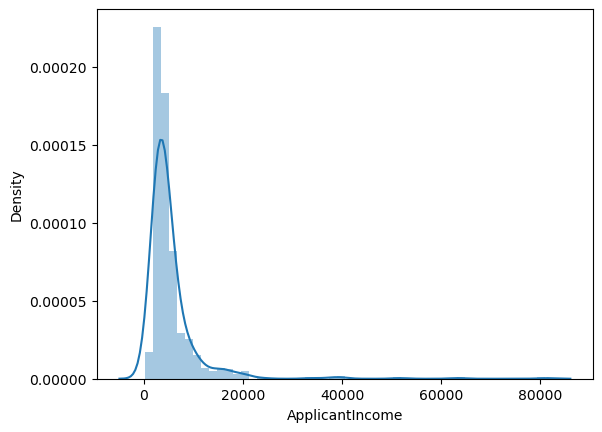

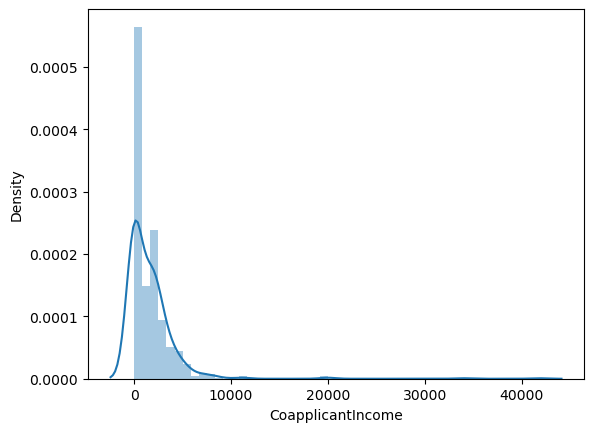

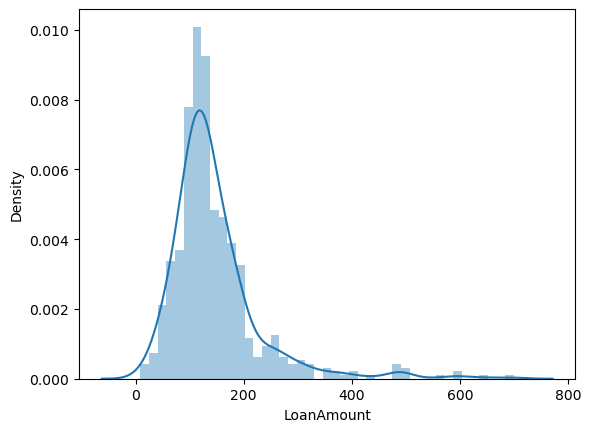

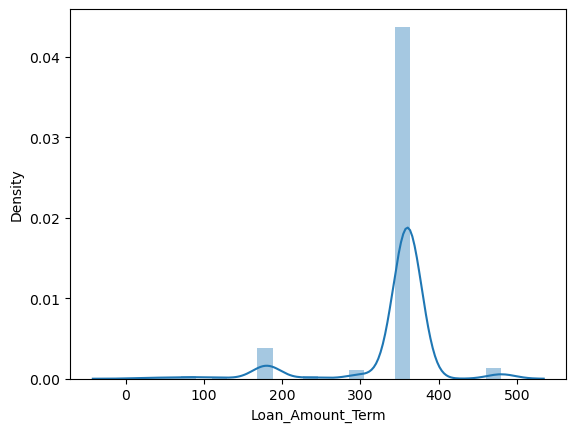

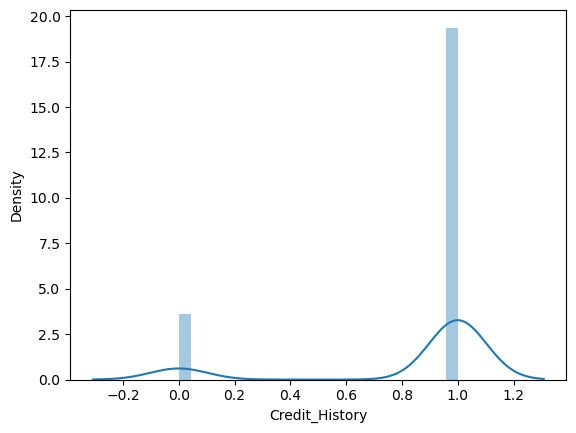

In [21]:
# check distribution of numerical col
for c in num_col:
  plt.figure()
  sb.distplot(data[c])

In [22]:
# Let handle missing values
for col in cat_col[1:]:
  data[col].fillna(data[col].mode()[0],inplace=True)

In [23]:
# Check the distribution of numerical col
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [24]:
# Fill missing values for numerical features
for col in num_col:
  data[col].fillna(data[col].median(),inplace=True)


#### Features extraction and data preprocessing

In [30]:
data['total_income']=data['ApplicantIncome']+data['CoapplicantIncome']

In [32]:
# let normalize the application and co-application income and total income col with log function
# data['log_ApplicantIncome']=np.log(data['ApplicantIncome'])
# data['log_CoapplicantIncome']=np.where(data['CoapplicantIncome']==0,np.nan, np.log(data['CoapplicantIncome']))
data['log_loan_amount']=np.log(data['LoanAmount'])
data['log_total_income']=np.log(data['total_income'])

In [34]:
# data['log_CoapplicantIncome'].fillna(data['log_CoapplicantIncome'].mean(),inplace=True)

Text(0, 0.5, 'Frequency')

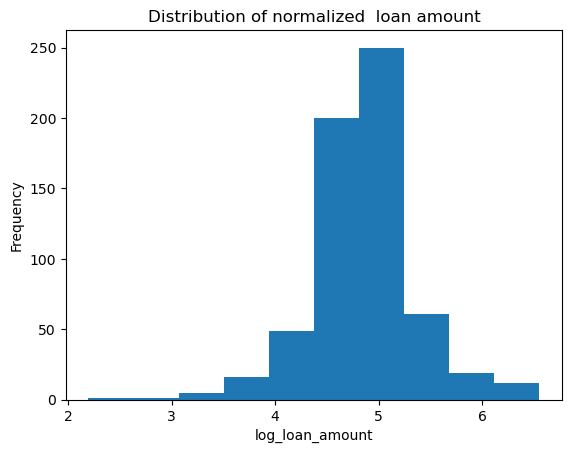

In [36]:
# # Normalized col

data['log_loan_amount'].plot(kind='hist', title='Distribution of normalized  loan amount')
plt.xlabel('log_loan_amount')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

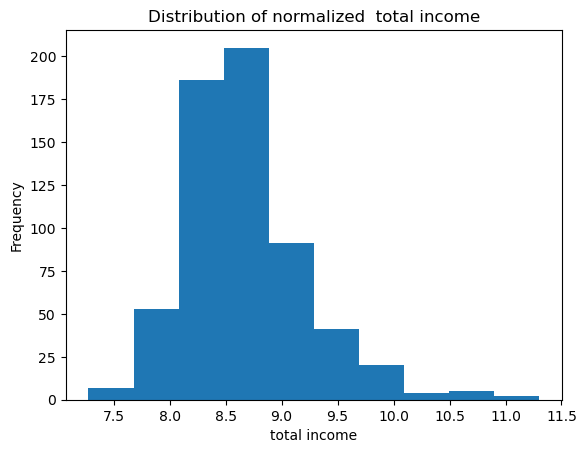

In [38]:
data['log_total_income'].plot(kind='hist', title='Distribution of normalized  total income')
plt.xlabel('total income')
plt.ylabel('Frequency')

In [40]:
# data[data['CoapplicantIncome']<=0]

In [42]:

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,log_loan_amount,log_total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,4.852030,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,4.948760,8.699515


In [80]:
data_copy=data.copy()

In [82]:
# # #Convert categorical features to numeric
# from sklearn.preprocessing import LabelEncoder
# label=LabelEncoder()
# for col in cat_col[1:]:
#   data_copy[col]=label.fit_transform(data_copy[col])

In [84]:
data_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,log_loan_amount,log_total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,4.852030,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,4.948760,8.699515


### Data Preprocessing
- choose only the numerical col
- scale the columns using standardscaler
- select data for training
- split dataset into training and testing

In [87]:
scaled_col=data_copy.iloc[:,[6,7,8,9,-1]]
sc_c=scaled_col.columns

In [89]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [91]:
# data_copy[sc_c]=scaler.fit_transform(data_copy[sc_c])

In [93]:
from sklearn.model_selection import train_test_split

In [95]:
X=data_copy.iloc[:, np.r_[1:6,9:12,13:15]]
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'total_income',
       'log_loan_amount'],
      dtype='object')

In [97]:
# X=data_copy.iloc[:, np.r_[1:6,9:12,13:15]]
y=data_copy.iloc[:,12].values

In [99]:
X

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,total_income,log_loan_amount
0,Male,No,0,Graduate,No,360.0,1.0,Urban,5849.0,4.852030
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,6091.0,4.852030
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,3000.0,4.189655
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,4941.0,4.787492
4,Male,No,0,Graduate,No,360.0,1.0,Urban,6000.0,4.948760
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,360.0,1.0,Rural,2900.0,4.262680
610,Male,Yes,3+,Graduate,No,180.0,1.0,Rural,4106.0,3.688879
611,Male,Yes,1,Graduate,No,360.0,1.0,Urban,8312.0,5.533389
612,Male,Yes,2,Graduate,No,360.0,1.0,Urban,7583.0,5.231109


In [101]:
selected_cat=X.select_dtypes('object').columns
selected_num=X.select_dtypes('number').columns
selected_cat


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [103]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for col in selected_cat:
  X[col]=label.fit_transform(X[col])

In [105]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,total_income,log_loan_amount
0,1,0,0,0,0,360.0,1.0,2,5849.0,4.852030
1,1,1,1,0,0,360.0,1.0,0,6091.0,4.852030
2,1,1,0,0,1,360.0,1.0,2,3000.0,4.189655
3,1,1,0,1,0,360.0,1.0,2,4941.0,4.787492
4,1,0,0,0,0,360.0,1.0,2,6000.0,4.948760


In [107]:
X[selected_num].describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_Amount_Term,614.0,342.410423,64.428629,12.000000,360.000000,360.00000,360.000000,480.00000
Credit_History,614.0,0.855049,0.352339,0.000000,1.000000,1.00000,1.000000,1.00000
total_income,614.0,7024.705081,6458.663872,1442.000000,4166.000000,5416.50000,7521.750000,81000.00000
log_loan_amount,614.0,4.857250,0.495996,2.197225,4.607658,4.85203,5.104426,6.55108


In [109]:
y=label.fit_transform(y)

In [111]:
X[selected_num]=scaler.fit_transform(X[selected_num])

In [115]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,total_income,log_loan_amount
0,1,0,0,0,0,0.273231,0.411733,2,-0.182184,-0.010533
1,1,1,1,0,0,0.273231,0.411733,0,-0.144684,-0.010533
2,1,1,0,0,1,0.273231,0.411733,2,-0.623656,-1.347068
3,1,1,0,1,0,0.273231,0.411733,2,-0.322885,-0.140758
4,1,0,0,0,0,0.273231,0.411733,2,-0.158785,0.184647


In [117]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# X=data_copy.drop(['Loan_ID','Loan_Status'], axis=1)
# y=data_copy['Loan_Status']

### Model Traininig and eveluation

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.neive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [121]:
ytrain

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
xtrain

array([[ 0.47374983,  0.71143163, -0.76304669, ..., -0.05166631,
        -0.18578759,  0.03528366],
       [ 0.47374983, -1.40561644,  0.22549137, ..., -0.05166631,
         0.59265746,  0.8314546 ],
       [ 0.47374983,  0.71143163, -0.76304669, ..., -1.32007414,
        -0.21134115,  0.28969366],
       ...,
       [ 0.47374983,  0.71143163,  2.2025675 , ..., -0.05166631,
         0.17167345,  0.87137547],
       [ 0.47374983,  0.71143163, -0.76304669, ...,  1.21674153,
        -0.16052278,  0.43044033],
       [-2.11081869,  0.71143163, -0.76304669, ..., -0.05166631,
        -0.095123  ,  0.68501609]])

Todo
- Convert to df and find a way around it
- only scale the numerical values


In [123]:
Dtreeclassifier=DecisionTreeClassifier()
Dtreeclassifier.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [125]:
models={'random':RandomForestClassifier()
        ,'tree':DecisionTreeClassifier(),
        'xgboost':XGBClassifier(),
        # 'logistic':LogisticRegression(),
        'naive-algorithm':GaussianNB(),
       'svc':SVC()}

In [127]:
def evaluate_model(model, x_train,x_test,y_train,y_test):
    train_scores=[]
    test_scores=[]
    name=[]
    np.random.seed(50)

    for key, model in model.items():
        #fit model
        model.fit(x_train, y_train)
        train_score= model.score(x_train,y_train)
        train_scores.append(train_score)
        test_score=model.score(x_test,y_test)
        test_scores.append(test_score)
        name.append(key)
        df=pd.DataFrame({'model':name,
                        'train_accuracy':train_scores, 'test_accuracy':test_scores})
    return df

In [129]:
%%time
score=evaluate_model(model=models,
                     x_train=xtrain,
                     x_test=xtest,
                     y_train=ytrain,
                     y_test=ytest
                    )
score

CPU times: total: 1.58 s
Wall time: 1.02 s


,model,train_accuracy,test_accuracy
0,random,1.000000,0.788618
1,tree,1.000000,0.674797
2,xgboost,1.000000,0.780488
3,naive-algorithm,0.800407,0.837398
4,svc,0.816701,0.829268


### Model selection
I will suggest we go for svm i.e svc model with its trainig accuracy of 83 and testing accuracy of 78. compares to the the tree and ensemble model which tend to show some sign of overfitting

In [131]:
model_sel= SVC()
model_sel.fit(xtrain,ytrain)

SVC()

In [133]:
predicted_value=model_sel.predict(xtest)

In [135]:
from sklearn.metrics import classification_report, confusion_matrix

In [137]:
class_re=classification_report(ytest,predicted_value)
print(class_re)

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [139]:
confusion_matrix(ytest,predicted_value)

array([[14, 19],
       [ 2, 88]], dtype=int64)

In [ ]:
### Apply Gridsearch to improve the performance of the model
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold,StratifiedKFold

In [ ]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
svc_param={'C':[-1,1,1.5,2],
           'gamma':['scale','auto'],
           'kernel':['linear','poly','rbf','sigmoid']}
kfcv=RepeatedStratifiedKFold(n_splits=5,shuffle=True,random_state=42)

grid_svc=GridSearchCV(estimator=SVC(),
                      param_grid=svc_param,
                      cv=kfcv,
                      scoring='accuracy')
grid_svc.fit(xtrain,ytrain)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [-1, 1, 1.5, 2], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
best_params=grid_svc.best_params_
best_params

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
grid_svc.best_score_

0.8021739130434782